In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
import pickle
import pandas as pd
import numpy as np
import os
import time
import datetime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from keras.constraints import MaxNorm
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from keras.regularizers import l1_l2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
#Load dataset
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
df = df.drop(["RowNumber","CustomerId","Surname"],axis = 1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [24]:
col_names = df.columns.drop(['CreditScore','Balance','EstimatedSalary','Exited'])
col_names

Index(['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember'],
      dtype='object')

In [25]:
for i in range(len(col_names)):
    name = col_names[i]
    print(f"{name}: {df[name].unique()}")

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
Age: [42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
Tenure: [ 2  1  8  7  4  6  3 10  5  9  0]
NumOfProducts: [1 3 2 4]
HasCrCard: [1 0]
IsActiveMember: [1 0]


In [26]:
#encoding categorical variables
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [27]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [28]:
##One hot encoding Geography column
onehot_encoder = OneHotEncoder()
geo_encoded = onehot_encoder.fit_transform(df[["Geography"]])
geo_encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 3)>

In [29]:
onehot_encoder.get_feature_names_out(["Geography"])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [10]:
geo_df = pd.DataFrame(geo_encoded.toarray(),columns=onehot_encoder.get_feature_names_out(["Geography"]))
geo_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [11]:
##combine all the encode columns with the original df
df = pd.concat([df.drop("Geography",axis=1),geo_df],axis=1)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [12]:
# Define the relative path to the models folder
models_folder = "../models"  # Adjust based on your folder structure

# Ensure the models folder exists
os.makedirs(models_folder, exist_ok=True)

# Save the encoders
with open(os.path.join(models_folder, "label_encoder_gender.pkl"), "wb") as file:
    pickle.dump(label_encoder, file)

with open(os.path.join(models_folder, "onehot_encoder_geo.pkl"), "wb") as file:
    pickle.dump(onehot_encoder, file)

print(f"Encoders saved in {models_folder}")

Encoders saved in ../models


In [13]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [14]:
# divide into dependent and independent features
X = df.drop("Exited",axis= 1)
y = df["Exited"]

#split the data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#scale these features
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [15]:
X_test

array([[-0.57749609,  0.91324755, -0.6557859 , ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.29729735,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.52560743, -1.09499335,  0.48508334, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.81311987, -1.09499335,  0.77030065, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.41876609,  0.91324755, -0.94100321, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.24540869,  0.91324755,  0.00972116, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [16]:
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [17]:
# Save the scaler
with open(os.path.join(models_folder, "scalar.pkl"), "wb") as file:
    pickle.dump(scale, file)

print(f"Scaler saved in {models_folder}")

Scaler saved in ../models


In [18]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


## ANN Implementation


In [19]:
( X_train.shape[1],)

(12,)

In [32]:
# Define the model
model = Sequential([
    Dense(64, 
          input_shape=(12,),  # Use input_shape for the first layer
          activation='relu', 
          kernel_initializer=HeNormal(), 
          kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4),
          kernel_constraint=MaxNorm(max_value=3.0),
          name='hiddenlayer1'),
    BatchNormalization(axis=-1),
    Dropout(0.2),
    Dense(32, 
          activation='relu', 
          kernel_initializer=HeNormal(), 
          kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4),
          kernel_constraint=MaxNorm(max_value=3.0),
          name='hiddenlayer2'),
    BatchNormalization(axis=-1),
    Dropout(0.2),
    Dense(1, 
          activation='sigmoid', 
          kernel_initializer='glorot_uniform', 
          name='Outputlayer')
])

/home/vscode/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-28 05:36:27.895352: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [33]:
model.layers

[<Dense name=hiddenlayer1, built=True>,
 <BatchNormalization name=batch_normalization, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=hiddenlayer2, built=True>,
 <BatchNormalization name=batch_normalization_1, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=Outputlayer, built=True>]

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hiddenlayer1 (Dense)            │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer2 (Dense)            │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Outputlayer (Dense)             │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 192 (768.00 B)

In [35]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=['accuracy'])

In [36]:
# Define the relative path to save the logs
root_folder = "../" 
log_dir = os.path.join(root_folder, "logs/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Ensure the log directory exists
os.makedirs(log_dir, exist_ok=True)

# Initialize TensorBoard callback
tb = TensorBoard(log_dir=log_dir, histogram_freq=1)

print(f"TensorBoard logs will be saved in {log_dir}")

TensorBoard logs will be saved in ../logs/fit20241128-053659


In [37]:
#early stopping
es = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)


In [38]:
## training the model
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,callbacks=[tb,es])

Epoch 1/100


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7718 - loss: 0.5184 - val_accuracy: 0.8480 - val_loss: 0.3839
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8386 - loss: 0.4078 - val_accuracy: 0.8560 - val_loss: 0.3653
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8392 - loss: 0.4059 - val_accuracy: 0.8700 - val_loss: 0.3631
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8454 - loss: 0.3891 - val_accuracy: 0.8595 - val_loss: 0.3626
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8521 - loss: 0.3779 - val_accuracy: 0.8660 - val_loss: 0.3592
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8473 - loss: 0.3858 - val_accuracy: 0.8555 - val_loss: 0.3598
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8442 - loss: 0.3835 - val_accuracy: 0.8595 - val_loss: 0.3616
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8493 - loss: 0.3736 - val_accuracy: 0.8610

In [39]:
history_df = pd.DataFrame(history.history)
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.809750,0.458070,0.8480,0.383894
1,0.842125,0.405339,0.8560,0.365328
2,0.841875,0.399580,0.8700,0.363144
3,0.844625,0.390543,0.8595,0.362637
4,0.848000,0.387426,0.8660,0.359160
5,0.845000,0.393916,0.8555,0.359789
6,0.846750,0.383289,0.8595,0.361569
7,0.849750,0.382050,0.8610,0.361350
8,0.847500,0.387250,0.8600,0.364687
9,0.849750,0.382451,0.8615,0.363711


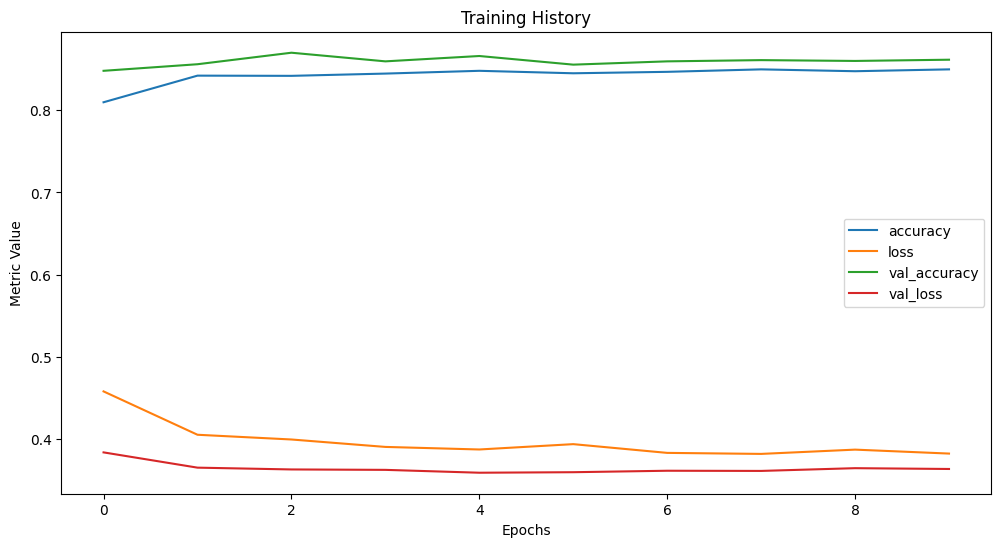

In [40]:
import matplotlib.pyplot as plt

# Plot each metric
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

for column in history_df.columns:
    plt.plot(history_df[column], label=column)  # Plot each column with a label

plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Metric Value')  # Y-axis label
plt.title('Training History')  # Plot title
plt.legend()  # Add a legend to differentiate the metrics
plt.show()  # Display the plot

In [41]:
# Save the model
model.save(os.path.join(models_folder, "model.keras"))

print(f"Model saved in {models_folder}")

Model saved in ../models


In [42]:
##load tensorboard ext
%load_ext tensorboard

In [44]:
%tensorboard --logdir ../logs/fit20241128-053659/

Reusing TensorBoard on port 6006 (pid 10194), started 0:00:31 ago. (Use '!kill 10194' to kill it.)